# Starbucks Capstone Challenge

### Analysing the BOGO and discount offers seperately to identify any patterns


# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [3]:
def compute_channel(row, channel):
    if(channel in row['channels']):
        return 1
    return 0

In [4]:
portfolio['email_adv']=portfolio.apply(lambda x: compute_channel(x,'email'), axis=1)
portfolio['mobile_adv']=portfolio.apply(lambda x: compute_channel(x,'mobile'), axis=1)
portfolio['social_adv']=portfolio.apply(lambda x: compute_channel(x,'social'), axis=1)
portfolio['web_adv']=portfolio.apply(lambda x: compute_channel(x,'web'), axis=1)

#portfolio.drop('channels',inplace=True,axis=1)
portfolio

,channels,difficulty,duration,id,offer_type,reward,email_adv,mobile_adv,social_adv,web_adv
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


In [5]:
#compute reward ratio 
def reward_ratio(row):
    if row['difficulty'] == 0:
        return 0
    else:
        return row['reward']/(float)(row['difficulty'])

In [6]:
portfolio['reward_ratio'] = portfolio.apply(lambda x : reward_ratio(x),axis=1)
portfolio

,channels,difficulty,duration,id,offer_type,reward,email_adv,mobile_adv,social_adv,web_adv,reward_ratio
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0,1.000000
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1,1.000000
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1,0.000000
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1,1.000000
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1,0.250000
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1,0.428571
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1,0.200000
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0,0.000000
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1,1.000000
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1,0.200000


In [7]:
#derive membership year
def membership_year(row):
    d= pd.to_datetime(row['became_member_on'], format='%Y%m%d', errors='ignore')
    return d.year

In [8]:
profile['memb_year']=profile.apply(lambda x: membership_year(x),axis=1)
profile.head()

,age,became_member_on,gender,id,income,memb_year
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,2017


In [10]:
profile.describe()

,age,became_member_on,income,memb_year
count,17000.000000,1.700000e+04,14825.000000,17000.000000
mean,62.531412,2.016703e+07,65404.991568,2016.635000
std,26.738580,1.167750e+04,21598.299410,1.177624
min,18.000000,2.013073e+07,30000.000000,2013.000000
25%,45.000000,2.016053e+07,49000.000000,2016.000000
50%,58.000000,2.017080e+07,64000.000000,2017.000000
75%,73.000000,2.017123e+07,80000.000000,2017.000000
max,118.000000,2.018073e+07,120000.000000,2018.000000


In [11]:
#derive age bin
def age_bucket(age):
    if age is not None:
        return int(np.floor(age)/10)
    else:
        return 0

In [12]:
profile['age_bin']=profile.age.apply(lambda x: age_bucket(x))
profile.head()

,age,became_member_on,gender,id,income,memb_year,age_bin
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017,11
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,5
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018,11
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,7
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,2017,11


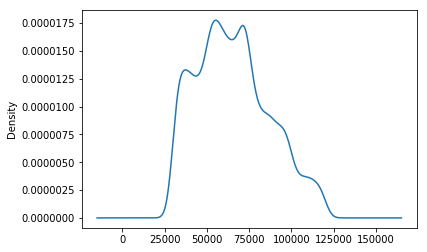

In [13]:

profile.income.plot.density()


In [14]:
#derive income bin
def income_bin(income):
    if np.isnan(income):
        return 0
    return int(np.floor(income/10000))

In [15]:
profile['income_bin']=profile.income.apply(lambda x: income_bin(x))
profile.head()

,age,became_member_on,gender,id,income,memb_year,age_bin,income_bin
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017,11,0
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,5,11
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018,11,0
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,7,10
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN,2017,11,0


In [16]:
profile.info(),profile.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 8 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
memb_year           17000 non-null int64
age_bin             17000 non-null int64
income_bin          17000 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.0+ MB


(None, (17000, 8))

In [17]:
#drop missing values
profile.dropna(inplace=True)
profile.shape

(14825, 8)

In [18]:
# Convert gender as a category column
profile['gender']=profile['gender'].astype('category',categories=['M','F','O'])
profile['gender']=profile.gender.cat.codes

C:\Users\Sandhya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
profile.groupby('gender').count()

,age,became_member_on,id,income,memb_year,age_bin,income_bin
gender,,,,,,,
0,8484,8484,8484,8484,8484,8484,8484
1,6129,6129,6129,6129,6129,6129,6129
2,212,212,212,212,212,212,212


In [23]:
#unique events in the transcript dataframe
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [180]:
# remove all the transaction type records
transcript = transcript[transcript['event']!='transaction'] 
transcript.shape

(109856, 4)

In [25]:
# remove all the 'offer viewed' type records
transcript = transcript[transcript['event']!='offer viewed'] 
transcript.shape

(109856, 4)

In [26]:
len(transcript.person.unique())

16994

In [27]:
transcript[transcript['event']=='offer received'].head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [28]:
#split data into offer_received and offer_transcript datasets
transcript_offer_received=transcript[transcript['event']=='offer received']
transcript_offer_completed = transcript[transcript['event']=='offer completed']
transcript_offer_completed.head()

,event,person,time,value
12658,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...
12672,offer completed,fe97aa22dd3e48c8b143116a8403dd52,0,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...
12679,offer completed,629fc02d56414d91bca360decdfa9288,0,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
12692,offer completed,676506bad68e4161b9bbaffeb039626b,0,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...
12697,offer completed,8f7dd3b2afe14c078eb4f6e6fe4ba97d,0,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...


In [29]:
transcript_offer_received['offerid'] = transcript_offer_received.value.apply(lambda x : x['offer id'])

C:\Users\Sandhya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
transcript_offer_completed['offerid'] = transcript_offer_completed.value.apply(lambda x: x['offer_id'])

C:\Users\Sandhya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
transcript_offer_received.head()

,event,person,time,value,offerid
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0


In [32]:
transcript_offer_completed.head()

,event,person,time,value,offerid
12658,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,2906b810c7d4411798c6938adc9daaa5
12672,offer completed,fe97aa22dd3e48c8b143116a8403dd52,0,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,fafdcd668e3743c1bb461111dcafc2a4
12679,offer completed,629fc02d56414d91bca360decdfa9288,0,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,9b98b8c7a33c4b65b9aebfe6a799e6d9
12692,offer completed,676506bad68e4161b9bbaffeb039626b,0,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,ae264e3637204a6fb9bb56bc8210ddfd
12697,offer completed,8f7dd3b2afe14c078eb4f6e6fe4ba97d,0,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,4d5c57ea9a6940dd891ad53e9dbe8da0


In [33]:
#drop columns that are not of use in the analysis
transcript_offer_received= transcript_offer_received.drop(['value','time','event'],axis=1)
transcript_offer_completed= transcript_offer_completed.drop(['value','time','event'],axis=1)

In [34]:
transcript_offer_received.columns=['person','id']
transcript_offer_received.head()

,person,id
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0


In [35]:
transcript_offer_completed.columns=['person','id']
transcript_offer_completed.head()

,person,id
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5
12672,fe97aa22dd3e48c8b143116a8403dd52,fafdcd668e3743c1bb461111dcafc2a4
12679,629fc02d56414d91bca360decdfa9288,9b98b8c7a33c4b65b9aebfe6a799e6d9
12692,676506bad68e4161b9bbaffeb039626b,ae264e3637204a6fb9bb56bc8210ddfd
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,4d5c57ea9a6940dd891ad53e9dbe8da0


In [36]:
#merge with profile dataframe
transcript_offer_received=pd.merge(transcript_offer_received,portfolio,how='left',on='id')
transcript_offer_completed=pd.merge(transcript_offer_completed,portfolio,how='left',on='id')

In [38]:
transcript_offer_received.drop(['channels','difficulty','duration','reward'],axis=1,inplace=True)
transcript_offer_received.head()

,person,id,offer_type,email_adv,mobile_adv,social_adv,web_adv,reward_ratio
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,1,0,1,1.00
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1,0,0,1,0.25
2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,discount,1,1,0,1,0.20
3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,discount,1,1,1,1,0.20
4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1,1,1,1,1.00


In [39]:
transcript_offer_completed.drop(['channels','difficulty','duration','reward'],axis=1,inplace=True)
transcript_offer_completed.head()

,person,id,offer_type,email_adv,mobile_adv,social_adv,web_adv,reward_ratio
0,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,discount,1,1,0,1,0.2
1,fe97aa22dd3e48c8b143116a8403dd52,fafdcd668e3743c1bb461111dcafc2a4,discount,1,1,1,1,0.2
2,629fc02d56414d91bca360decdfa9288,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,1,1,0,1,1.0
3,676506bad68e4161b9bbaffeb039626b,ae264e3637204a6fb9bb56bc8210ddfd,bogo,1,1,1,0,1.0
4,8f7dd3b2afe14c078eb4f6e6fe4ba97d,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,1,1,1,1,1.0


In [40]:
#groupby person and offertype to evaluate whihc person has completed/received which kind of offer.
offer_received_count = transcript_offer_received.groupby(['person','offer_type']).count().reset_index()
offer_received_count.head()

,person,offer_type,id,email_adv,mobile_adv,social_adv,web_adv,reward_ratio
0,0009655768c64bdeb2e877511632db8f,bogo,1,1,1,1,1,1
1,0009655768c64bdeb2e877511632db8f,discount,2,2,2,2,2,2
2,0009655768c64bdeb2e877511632db8f,informational,2,2,2,2,2,2
3,00116118485d4dfda04fdbaba9a87b5c,bogo,2,2,2,2,2,2
4,0011e0d4e6b944f998e987f904e8c1e5,bogo,1,1,1,1,1,1


In [41]:
offer_completed_count = transcript_offer_completed.groupby(['person','offer_type']).count().reset_index()
offer_completed_count.head()

,person,offer_type,id,email_adv,mobile_adv,social_adv,web_adv,reward_ratio
0,0009655768c64bdeb2e877511632db8f,bogo,1,1,1,1,1,1
1,0009655768c64bdeb2e877511632db8f,discount,2,2,2,2,2,2
2,0011e0d4e6b944f998e987f904e8c1e5,bogo,1,1,1,1,1,1
3,0011e0d4e6b944f998e987f904e8c1e5,discount,2,2,2,2,2,2
4,0020c2b971eb4e9188eac86d93036a77,bogo,1,1,1,1,1,1


In [187]:
# 
print('In the below cells we split the number different offers that were received and completed. We will merge all of them together later.')


In the below cells we split the number different offers that were received and completed. We will merge all of them together later.


In [42]:

received_n_bogo=offer_received_count[offer_received_count['offer_type']=='bogo']
received_n_bogo = received_n_bogo[['person','id']]
received_n_bogo.columns=['person','received_n_bogo']
received_n_bogo.head()

,person,received_n_bogo
0,0009655768c64bdeb2e877511632db8f,1
3,00116118485d4dfda04fdbaba9a87b5c,2
4,0011e0d4e6b944f998e987f904e8c1e5,1
7,0020c2b971eb4e9188eac86d93036a77,2
10,0020ccbbb6d84e358d3414a3ff76cffd,2


In [43]:
received_n_discount=offer_received_count[offer_received_count['offer_type']=='discount']
received_n_discount = received_n_discount[['person','id']]
received_n_discount.columns=['person','received_n_discount']
received_n_discount.head()

,person,received_n_discount
1,0009655768c64bdeb2e877511632db8f,2
5,0011e0d4e6b944f998e987f904e8c1e5,2
8,0020c2b971eb4e9188eac86d93036a77,2
11,0020ccbbb6d84e358d3414a3ff76cffd,1
13,003d66b6608740288d6cc97a6903f4f0,3


In [44]:
received_n_info=offer_received_count[offer_received_count['offer_type']=='informational']
received_n_info = received_n_info[['person','id']]
received_n_info.columns=['person','received_n_info']
received_n_info.head()

,person,received_n_info
2,0009655768c64bdeb2e877511632db8f,2
6,0011e0d4e6b944f998e987f904e8c1e5,2
9,0020c2b971eb4e9188eac86d93036a77,1
12,0020ccbbb6d84e358d3414a3ff76cffd,1
14,003d66b6608740288d6cc97a6903f4f0,2


In [45]:
completed_n_bogo=offer_completed_count[offer_completed_count['offer_type']=='bogo']
completed_n_bogo = completed_n_bogo[['person','id']]
completed_n_bogo.columns=['person','completed_n_bogo']
completed_n_bogo.head()

,person,completed_n_bogo
0,0009655768c64bdeb2e877511632db8f,1
2,0011e0d4e6b944f998e987f904e8c1e5,1
4,0020c2b971eb4e9188eac86d93036a77,1
6,0020ccbbb6d84e358d3414a3ff76cffd,2
10,004b041fbfe44859945daa2c7f79ee64,1


In [46]:
completed_n_discount=offer_completed_count[offer_completed_count['offer_type']=='discount']
completed_n_discount = completed_n_discount[['person','id']]
completed_n_discount.columns=['person','completed_n_discount']
completed_n_discount.head()

,person,completed_n_discount
1,0009655768c64bdeb2e877511632db8f,2
3,0011e0d4e6b944f998e987f904e8c1e5,2
5,0020c2b971eb4e9188eac86d93036a77,2
7,0020ccbbb6d84e358d3414a3ff76cffd,1
8,003d66b6608740288d6cc97a6903f4f0,3


In [47]:
receivedDf = pd.merge(received_n_bogo,received_n_discount,how='outer',on='person')
receivedDf.head()

,person,received_n_bogo,received_n_discount
0,0009655768c64bdeb2e877511632db8f,1.0,2.0
1,00116118485d4dfda04fdbaba9a87b5c,2.0,NaN
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0


In [48]:
receivedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16928 entries, 0 to 16927
Data columns (total 3 columns):
person                 16928 non-null object
received_n_bogo        14992 non-null float64
received_n_discount    14945 non-null float64
dtypes: float64(2), object(1)
memory usage: 529.0+ KB


In [49]:
completedDf = pd.merge(completed_n_bogo,completed_n_discount,how='outer',on='person')
completedDf.head()

,person,completed_n_bogo,completed_n_discount
0,0009655768c64bdeb2e877511632db8f,1.0,2.0
1,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0
2,0020c2b971eb4e9188eac86d93036a77,1.0,2.0
3,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0
4,004b041fbfe44859945daa2c7f79ee64,1.0,1.0


In [50]:
receivedDf.fillna(value=0, inplace=True)
receivedDf.head()

,person,received_n_bogo,received_n_discount
0,0009655768c64bdeb2e877511632db8f,1.0,2.0
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0


In [51]:
completedDf.fillna(value=0, inplace=True)
#completedDf.head()
completedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12774 entries, 0 to 12773
Data columns (total 3 columns):
person                  12774 non-null object
completed_n_bogo        12774 non-null float64
completed_n_discount    12774 non-null float64
dtypes: float64(2), object(1)
memory usage: 399.2+ KB


In [52]:
receivedDf.shape

(16928, 3)

In [53]:
completedDf.shape

(12774, 3)

In [54]:
#Merging the received and the completed dataframe
offer_merged_info = pd.merge(receivedDf,completedDf,on='person',how='left')

In [55]:
offer_merged_info.shape

(16928, 5)

In [56]:
offer_merged_info.columns

Index(['person', 'received_n_bogo', 'received_n_discount', 'completed_n_bogo',
       'completed_n_discount'],
      dtype='object')

In [57]:
offer_merged_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16928 entries, 0 to 16927
Data columns (total 5 columns):
person                  16928 non-null object
received_n_bogo         16928 non-null float64
received_n_discount     16928 non-null float64
completed_n_bogo        12774 non-null float64
completed_n_discount    12774 non-null float64
dtypes: float64(4), object(1)
memory usage: 793.5+ KB


In [58]:
#fill missing values with zero. Here we choose to fill instead of drop because we did a join in the previous step. 
#Missing rows indicate no completion records
offer_merged_info.completed_n_bogo.fillna(0.0,inplace=True)
offer_merged_info.completed_n_discount.fillna(0.0,inplace=True)
offer_merged_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16928 entries, 0 to 16927
Data columns (total 5 columns):
person                  16928 non-null object
received_n_bogo         16928 non-null float64
received_n_discount     16928 non-null float64
completed_n_bogo        16928 non-null float64
completed_n_discount    16928 non-null float64
dtypes: float64(4), object(1)
memory usage: 793.5+ KB


In [59]:
def compute_completed_fraction(row,numerator,denominator):
    if(row[denominator]==0.0):
        return -1.0
    return row[numerator]/(float)(row[denominator])

In [60]:
#compute the completed-fraction column for both the offer types
offer_merged_info['bogo_completed_fraction']=offer_merged_info.apply(lambda x: compute_completed_fraction(x,'completed_n_bogo','received_n_bogo'), axis=1)
offer_merged_info['discount_completed_fraction']=offer_merged_info.apply(lambda x: compute_completed_fraction(x,'completed_n_discount','received_n_discount'), axis=1)
offer_merged_info.head()

,person,received_n_bogo,received_n_discount,completed_n_bogo,completed_n_discount,bogo_completed_fraction,discount_completed_fraction
0,0009655768c64bdeb2e877511632db8f,1.0,2.0,1.0,2.0,1.0,1.0
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,0.0,0.0,-1.0
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0,1.0,2.0,1.0,1.0
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0,1.0,2.0,0.5,1.0
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0,2.0,1.0,1.0,1.0


In [61]:
#choosing required columns
offer_merged_info_min=offer_merged_info[['person','bogo_completed_fraction','discount_completed_fraction']]
offer_merged_info_min.rename({'person':'id'},axis=1,inplace=True)
offer_merged_info_min.head()

C:\Users\Sandhya\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,id,bogo_completed_fraction,discount_completed_fraction
0,0009655768c64bdeb2e877511632db8f,1.0,1.0
1,00116118485d4dfda04fdbaba9a87b5c,0.0,-1.0
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,1.0
3,0020c2b971eb4e9188eac86d93036a77,0.5,1.0
4,0020ccbbb6d84e358d3414a3ff76cffd,1.0,1.0


In [62]:
offer_merged_info.shape

(16928, 7)

In [65]:
offer_profile = pd.merge(offer_merged_info_min,profile,how='left',on='id')
offer_profile.head()

,id,bogo_completed_fraction,discount_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin
0,0009655768c64bdeb2e877511632db8f,1.0,1.0,33.0,20170421.0,0.0,72000.0,2017.0,3.0,7.0
1,00116118485d4dfda04fdbaba9a87b5c,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,1.0,40.0,20180109.0,2.0,57000.0,2018.0,4.0,5.0
3,0020c2b971eb4e9188eac86d93036a77,0.5,1.0,59.0,20160304.0,1.0,90000.0,2016.0,5.0,9.0
4,0020ccbbb6d84e358d3414a3ff76cffd,1.0,1.0,24.0,20161111.0,1.0,60000.0,2016.0,2.0,6.0


In [66]:
offer_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16928 entries, 0 to 16927
Data columns (total 10 columns):
id                             16928 non-null object
bogo_completed_fraction        16928 non-null float64
discount_completed_fraction    16928 non-null float64
age                            14764 non-null float64
became_member_on               14764 non-null float64
gender                         14764 non-null float64
income                         14764 non-null float64
memb_year                      14764 non-null float64
age_bin                        14764 non-null float64
income_bin                     14764 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [67]:
#Here we drop missing values as rows are missing age, gender and income.
offer_profile.dropna(inplace=True)
offer_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14764 entries, 0 to 16927
Data columns (total 10 columns):
id                             14764 non-null object
bogo_completed_fraction        14764 non-null float64
discount_completed_fraction    14764 non-null float64
age                            14764 non-null float64
became_member_on               14764 non-null float64
gender                         14764 non-null float64
income                         14764 non-null float64
memb_year                      14764 non-null float64
age_bin                        14764 non-null float64
income_bin                     14764 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [68]:
def yes_or_no(row,compute_column,percentage):
    if row[compute_column] == -1.0:
        return -1
    elif row[compute_column]>=percentage:
        return 1
    return 0

In [69]:
#Choose probability of offer completion as 0.6
offer_profile['bogo']=offer_profile.apply(lambda x: yes_or_no(x,'bogo_completed_fraction',0.6), axis=1)
offer_profile['discount']=offer_profile.apply(lambda x: yes_or_no(x,'discount_completed_fraction',0.6), axis=1)
offer_profile.head()

,id,bogo_completed_fraction,discount_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo,discount
0,0009655768c64bdeb2e877511632db8f,1.0,1.0,33.0,20170421.0,0.0,72000.0,2017.0,3.0,7.0,1,1
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,1.0,40.0,20180109.0,2.0,57000.0,2018.0,4.0,5.0,1,1
3,0020c2b971eb4e9188eac86d93036a77,0.5,1.0,59.0,20160304.0,1.0,90000.0,2016.0,5.0,9.0,0,1
4,0020ccbbb6d84e358d3414a3ff76cffd,1.0,1.0,24.0,20161111.0,1.0,60000.0,2016.0,2.0,6.0,1,1
5,004b041fbfe44859945daa2c7f79ee64,1.0,1.0,55.0,20180508.0,1.0,74000.0,2018.0,5.0,7.0,1,1


In [71]:
#Completion fraction -1 indicates that the offers were not received by those ppl. Hence ignoring those.
#Creating seperate datasets for bogo and discount offers
bogo_alone=offer_profile[offer_profile['bogo_completed_fraction']!=-1.0]
bogo_alone.shape

(13082, 12)

In [72]:
discount_alone=offer_profile[offer_profile['discount_completed_fraction']!=-1.0]
discount_alone.shape

(13042, 12)

In [73]:
bogo_alone.groupby('bogo').count().reset_index()

,bogo,id,bogo_completed_fraction,discount_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,discount
0,0,6302,6302,6302,6302,6302,6302,6302,6302,6302,6302,6302
1,1,6780,6780,6780,6780,6780,6780,6780,6780,6780,6780,6780


In [74]:
#about 46% of people avail the bogo offer atleast 80% of time.
#about 51% of people avail the bogo offer atleast 60% of time.
#about 63% of people avail the bogo offer atleast 50% of time.

In [75]:
discount_alone.groupby('discount').count().reset_index()

,discount,id,bogo_completed_fraction,discount_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo
0,0,5250,5250,5250,5250,5250,5250,5250,5250,5250,5250,5250
1,1,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792,7792


In [76]:
#about 54% of people avail the discount offer atleast 80% of time.
#about 60% of people avail the discount offer atleast 50% of time.
#about 70% of people avail the discount offer atleast 50% of the time

In [77]:
bogo_alone.drop(['discount_completed_fraction','discount'],inplace=True, axis=1)

C:\Users\Sandhya\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [78]:
bogo_alone.head()

,id,bogo_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo
0,0009655768c64bdeb2e877511632db8f,1.0,33.0,20170421.0,0.0,72000.0,2017.0,3.0,7.0,1
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,40.0,20180109.0,2.0,57000.0,2018.0,4.0,5.0,1
3,0020c2b971eb4e9188eac86d93036a77,0.5,59.0,20160304.0,1.0,90000.0,2016.0,5.0,9.0,0
4,0020ccbbb6d84e358d3414a3ff76cffd,1.0,24.0,20161111.0,1.0,60000.0,2016.0,2.0,6.0,1
5,004b041fbfe44859945daa2c7f79ee64,1.0,55.0,20180508.0,1.0,74000.0,2018.0,5.0,7.0,1


In [79]:
bogo_alone[bogo_alone['bogo']==1].groupby('gender').count()

,id,bogo_completed_fraction,age,became_member_on,income,memb_year,age_bin,income_bin,bogo
gender,,,,,,,,,
0.0,3237,3237,3237,3237,3237,3237,3237,3237,3237
1.0,3420,3420,3420,3420,3420,3420,3420,3420,3420
2.0,123,123,123,123,123,123,123,123,123


In [80]:
discount_alone[discount_alone['discount']==1].groupby('gender').count()

,id,bogo_completed_fraction,discount_completed_fraction,age,became_member_on,income,memb_year,age_bin,income_bin,bogo,discount
gender,,,,,,,,,,,
0.0,3944,3944,3944,3944,3944,3944,3944,3944,3944,3944,3944
1.0,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722
2.0,126,126,126,126,126,126,126,126,126,126,126


In [82]:
#Create seperate dataframe for those who completed the offers for analysis reasons
bogo_yes = bogo_alone[bogo_alone['bogo']==1]
discount_yes = discount_alone[discount_alone['discount']==1]

In [188]:
bogo_yes.describe()

,bogo_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo
count,6780.000000,6780.000000,6.780000e+03,6780.000000,6780.000000,6780.000000,6780.000000,6780.000000,6780.0
mean,0.963171,56.481416,2.016499e+07,0.540708,71031.268437,2016.429646,5.197493,6.661504,1.0
std,0.101888,16.534107,1.060751e+04,0.533543,21346.243213,1.070700,1.680242,2.124678,0.0
min,0.600000,18.000000,2.013073e+07,0.000000,30000.000000,2013.000000,1.000000,3.000000,1.0
25%,1.000000,46.000000,2.016033e+07,0.000000,55000.000000,2016.000000,4.000000,5.000000,1.0
50%,1.000000,57.000000,2.017013e+07,1.000000,71000.000000,2017.000000,5.000000,7.000000,1.0
75%,1.000000,67.000000,2.017101e+07,1.000000,87000.000000,2017.000000,6.000000,8.000000,1.0
max,1.000000,101.000000,2.018073e+07,2.000000,120000.000000,2018.000000,10.000000,12.000000,1.0


In [84]:
discount_yes.describe()

,bogo_completed_fraction,discount_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo,discount
count,7792.000000,7792.000000,7792.000000,7.792000e+03,7792.000000,7792.000000,7792.000000,7792.000000,7792.000000,7792.000000,7792.0
mean,0.523304,0.967069,55.846253,2.016448e+07,0.510010,69448.023614,2016.379107,5.132957,6.501412,0.484856,1.0
std,0.681309,0.097105,16.938350,1.137425e+04,0.531297,21476.863671,1.146228,1.719006,2.138450,0.711695,0.0
min,-1.000000,0.600000,18.000000,2.013073e+07,0.000000,30000.000000,2013.000000,1.000000,3.000000,-1.000000,1.0
25%,0.000000,1.000000,45.000000,2.016030e+07,0.000000,53000.000000,2016.000000,4.000000,5.000000,0.000000,1.0
50%,1.000000,1.000000,57.000000,2.017013e+07,0.000000,68000.000000,2017.000000,5.000000,6.000000,1.000000,1.0
75%,1.000000,1.000000,67.000000,2.017102e+07,1.000000,85000.000000,2017.000000,6.000000,8.000000,1.000000,1.0
max,1.000000,1.000000,101.000000,2.018073e+07,2.000000,120000.000000,2018.000000,10.000000,12.000000,1.000000,1.0


In [85]:
import matplotlib.pyplot as plt


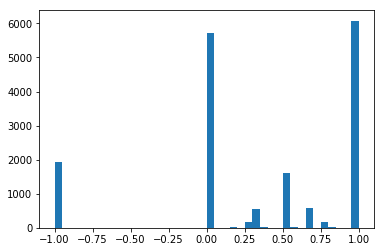

In [86]:
plt.hist(offer_merged_info['bogo_completed_fraction'], bins=40)
plt.show()

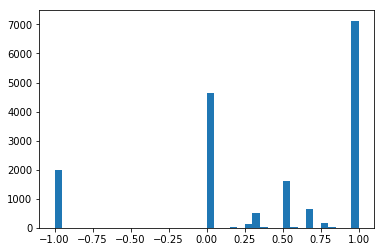

In [89]:
plt.hist(offer_merged_info_min['discount_completed_fraction'],bins=40)
plt.show()

In [189]:
offer_merged_info_min.head()

,id,bogo_completed_fraction,discount_completed_fraction
0,0009655768c64bdeb2e877511632db8f,1.0,1.0
1,00116118485d4dfda04fdbaba9a87b5c,0.0,-1.0
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,1.0
3,0020c2b971eb4e9188eac86d93036a77,0.5,1.0
4,0020ccbbb6d84e358d3414a3ff76cffd,1.0,1.0


In [126]:
bogo_alone.shape, discount_alone.shape

((13082, 10), (13042, 12))

In [127]:
bogo_alone.columns

Index(['id', 'bogo_completed_fraction', 'age', 'became_member_on', 'gender',
       'income', 'memb_year', 'age_bin', 'income_bin', 'bogo'],
      dtype='object')

In [128]:
bogo_alone[bogo_alone['bogo_completed_fraction']==1].shape,discount_alone[discount_alone['discount_completed_fraction']==1].shape,

((5982, 10), (6974, 12))

In [92]:
discount_alone[discount_alone['discount_completed_fraction']==-1.0]

,id,bogo_completed_fraction,discount_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo,discount


In [93]:
bogo_yes.groupby('gender').count().reset_index()

,gender,id,bogo_completed_fraction,age,became_member_on,income,memb_year,age_bin,income_bin,bogo
0,0.0,3237,3237,3237,3237,3237,3237,3237,3237,3237
1,1.0,3420,3420,3420,3420,3420,3420,3420,3420,3420
2,2.0,123,123,123,123,123,123,123,123,123


In [94]:
bogo_yes_genderct=bogo_yes.groupby('gender').count().reset_index()
#bogo_yes_genderct.iloc[:,0]

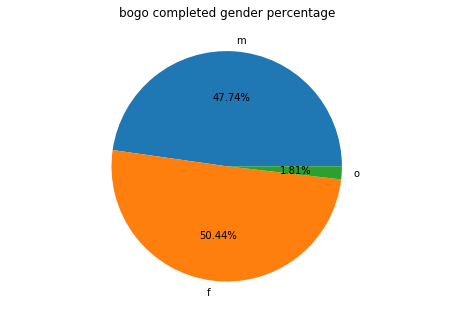

In [95]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
#ax.title('bogo completed gender percentage')
#ax.pie(bogo_yes.groupby('gender').count().iloc[:,0], labels = ['m','f','o'],autopct='%1.2f%%')
ax.pie(bogo_yes_genderct.id, labels = ['m','f','o'],autopct='%1.2f%%')
plt.title('bogo completed gender percentage')
plt.show()

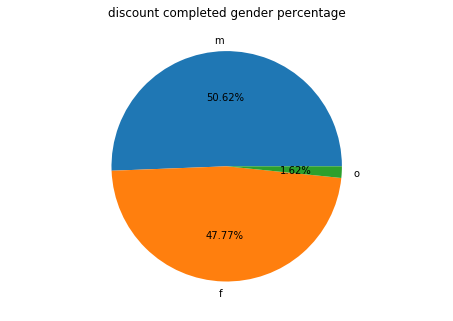

In [96]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
#ax.title('bogo completed gender percentage')
ax.pie(discount_yes.groupby('gender').count().iloc[:,0], labels = ['m','f','o'],autopct='%1.2f%%')
plt.title('discount completed gender percentage')
plt.show()

In [97]:
male_bogo = bogo_alone[bogo_alone['gender']==0]
male_bogo.groupby('bogo').count()#43% completed

,id,bogo_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin
bogo,,,,,,,,,
0,4262,4262,4262,4262,4262,4262,4262,4262,4262
1,3237,3237,3237,3237,3237,3237,3237,3237,3237


In [98]:
male_discount = discount_alone[discount_alone['gender']==0]
male_discount.groupby('discount').count()#53% completed

,id,bogo_completed_fraction,discount_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo
discount,,,,,,,,,,,
0,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493
1,3944,3944,3944,3944,3944,3944,3944,3944,3944,3944,3944


In [99]:

female_discount = discount_alone[discount_alone['gender']==1]
trans_discount = discount_alone[discount_alone['gender']==2]
#male_discount.groupby('bogo').count()

In [100]:
female_bogo = bogo_alone[bogo_alone['gender']==1]
trans_bogo = bogo_alone[bogo_alone['gender']==2]

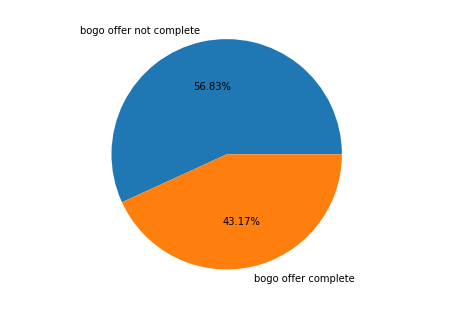

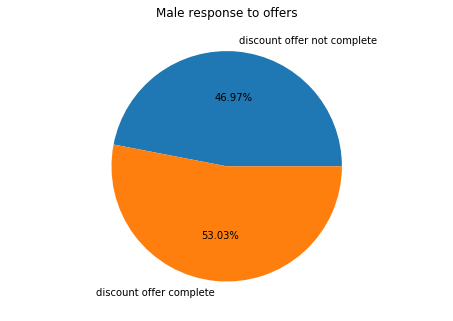

In [130]:
fig1 = plt.figure(1)
ax1 = fig1.add_axes([0,0,1,1])
ax1.axis('equal')

ax1.pie(male_bogo.groupby('bogo').count().iloc[:,0], labels = ['bogo offer not complete','bogo offer complete'],autopct='%1.2f%%')


fig2 = plt.figure(2)
ax2 = fig2.add_axes([0,0,1,1])
ax2.axis('equal')

ax2.pie(male_discount.groupby('discount').count().iloc[:,0], labels = ['discount offer not complete','discount offer complete'],autopct='%1.2f%%')
plt.title('Male response to offers')
plt.show()

In [104]:
female_bogo = bogo_alone[bogo_alone['gender']==1]
female_bogo.groupby('bogo').count()#63.3%

,id,bogo_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin
bogo,,,,,,,,,
0,1981,1981,1981,1981,1981,1981,1981,1981,1981
1,3420,3420,3420,3420,3420,3420,3420,3420,3420


In [105]:
female_discount = discount_alone[discount_alone['gender']==1]
female_discount.groupby('discount').count()#68%

,id,bogo_completed_fraction,discount_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo
discount,,,,,,,,,,,
0,1698,1698,1698,1698,1698,1698,1698,1698,1698,1698,1698
1,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722


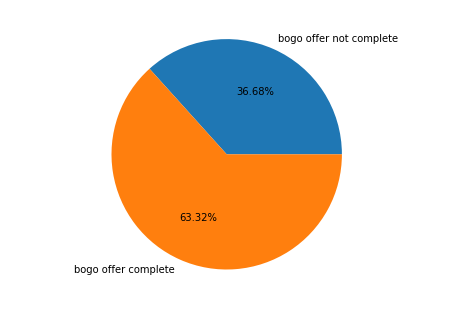

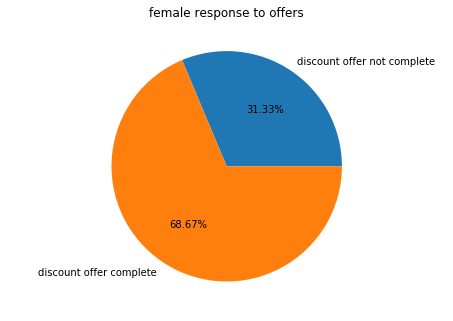

In [131]:
fig1 = plt.figure(1)
ax1 = fig1.add_axes([0,0,1,1])
ax1.axis('equal')

ax1.pie(female_bogo.groupby('bogo').count().iloc[:,0], labels = ['bogo offer not complete','bogo offer complete'],autopct='%1.2f%%')


fig2 = plt.figure(2)
ax2 = fig2.add_axes([0,0,1,1])
ax2.axis('equal')

ax2.pie(female_discount.groupby('discount').count().iloc[:,0], labels = ['discount offer not complete','discount offer complete'],autopct='%1.2f%%')
plt.title('female response to offers')
plt.show()

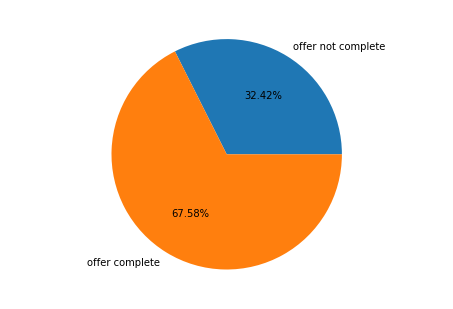

In [106]:
transg_bogo = bogo_alone[bogo_alone['gender']==2]
transg_bogo.groupby('bogo').count()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(transg_bogo.groupby('bogo').count().iloc[:,0], labels =['offer not complete','offer complete'],autopct='%1.2f%%')
plt.show()

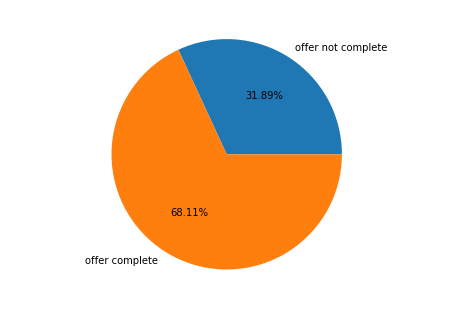

In [107]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(trans_discount.groupby('discount').count().iloc[:,0], labels =['offer not complete','offer complete'],autopct='%1.2f%%')
plt.show()

In [108]:
## membership year analysis

In [109]:
male_bogo[male_bogo['bogo']==1].groupby('memb_year').count()

,id,bogo_completed_fraction,age,became_member_on,gender,income,age_bin,income_bin,bogo
memb_year,,,,,,,,,
2013.0,59,59,59,59,59,59,59,59,59
2014.0,152,152,152,152,152,152,152,152,152
2015.0,454,454,454,454,454,454,454,454,454
2016.0,917,917,917,917,917,917,917,917,917
2017.0,1175,1175,1175,1175,1175,1175,1175,1175,1175
2018.0,480,480,480,480,480,480,480,480,480


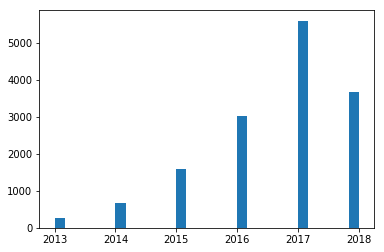

In [134]:
plt.hist(profile.memb_year, bins=30)
plt.show()

In [136]:
profile.memb_year.unique()

array([2017, 2018, 2014, 2016, 2013, 2015], dtype=int64)

In [171]:
profile.groupby('memb_year').count().reset_index().iloc[:,1]

0     274
1     662
2    1597
3    3024
4    5599
5    3669
Name: age, dtype: int64

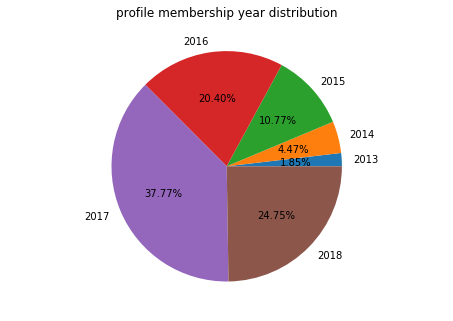

In [179]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(profile.groupby('memb_year').count().reset_index().iloc[:,1], labels=[2013,2014,2015,2016,2017,2018],autopct='%1.2f%%')
plt.title('profile membership year distribution')
plt.show()

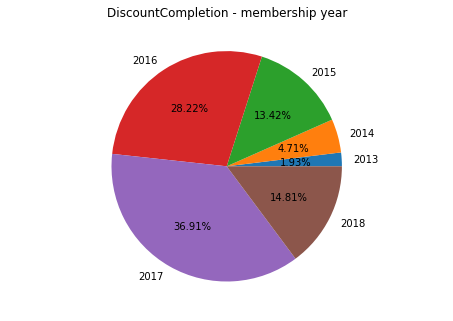

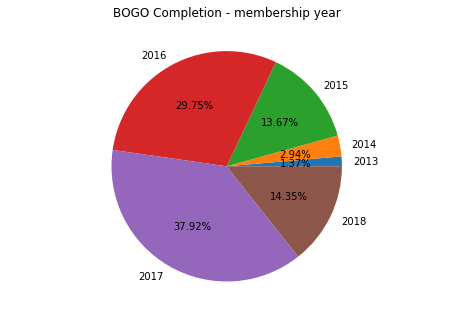

In [178]:
# plt.hist(offer_profile[offer_profile['discount']==1].memb_year, bins=30)
# plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(offer_profile[offer_profile['discount']==1].groupby('memb_year').count().reset_index().iloc[:,1], labels=[2013,2014,2015,2016,2017,2018],autopct='%1.2f%%')
plt.title('DiscountCompletion - membership year')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(offer_profile[offer_profile['bogo']==1].groupby('memb_year').count().reset_index().iloc[:,1], labels=[2013,2014,2015,2016,2017,2018],autopct='%1.2f%%')
plt.title('BOGO Completion - membership year')
plt.show()

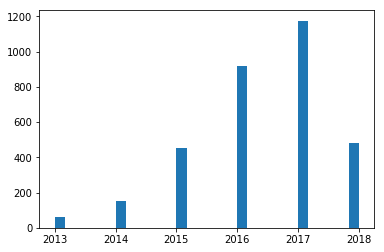

In [110]:
plt.hist(male_bogo[male_bogo['bogo']==1].memb_year, bins=30)
plt.show()

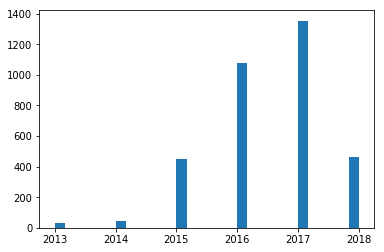

In [111]:
plt.hist(female_bogo[female_bogo['bogo']==1].memb_year, bins=30)
plt.show()

In [112]:
female_bogo[female_bogo['bogo']==1].describe()

,bogo_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo
count,3420.000000,3420.000000,3.420000e+03,3420.0,3420.000000,3420.000000,3420.000000,3420.000000,3420.0
mean,0.965736,58.042690,2.016549e+07,1.0,73935.964912,2016.478655,5.352924,6.948538,1.0
std,0.098536,16.558844,9.768589e+03,0.0,21664.374517,0.988001,1.691904,2.149498,0.0
min,0.600000,18.000000,2.013080e+07,1.0,30000.000000,2013.000000,1.000000,3.000000,1.0
25%,1.000000,49.000000,2.016042e+07,1.0,57000.000000,2016.000000,4.000000,5.000000,1.0
50%,1.000000,58.000000,2.017021e+07,1.0,73000.000000,2017.000000,5.000000,7.000000,1.0
75%,1.000000,69.000000,2.017101e+07,1.0,90000.000000,2017.000000,6.000000,9.000000,1.0
max,1.000000,101.000000,2.018073e+07,1.0,120000.000000,2018.000000,10.000000,12.000000,1.0


In [113]:
female_bogo.describe()

,bogo_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo
count,5401.000000,5401.000000,5.401000e+03,5401.0,5401.000000,5401.000000,5401.000000,5401.000000,5401.000000
mean,0.678930,57.545825,2.016701e+07,1.0,71273.282725,2016.631179,5.304944,6.690057,0.633216
std,0.409147,16.887794,1.066314e+04,0.0,22417.778307,1.076974,1.719106,2.225157,0.481971
min,0.000000,18.000000,2.013073e+07,1.0,30000.000000,2013.000000,1.000000,3.000000,0.000000
25%,0.333333,48.000000,2.016061e+07,1.0,54000.000000,2016.000000,4.000000,5.000000,0.000000
50%,1.000000,58.000000,2.017062e+07,1.0,71000.000000,2017.000000,5.000000,7.000000,1.000000
75%,1.000000,69.000000,2.017121e+07,1.0,88000.000000,2017.000000,6.000000,8.000000,1.000000
max,1.000000,101.000000,2.018073e+07,1.0,120000.000000,2018.000000,10.000000,12.000000,1.000000


In [114]:
male_bogo[male_bogo['bogo']==1].describe()

,bogo_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,income_bin,bogo
count,3237.000000,3237.000000,3.237000e+03,3237.0,3237.000000,3237.000000,3237.000000,3237.000000,3237.0
mean,0.960153,54.847081,2.016439e+07,0.0,68135.310473,2016.370714,5.036145,6.375039,1.0
std,0.105696,16.377965,1.136428e+04,0.0,20678.828484,1.145090,1.656427,2.066471,0.0
min,0.600000,18.000000,2.013073e+07,0.0,30000.000000,2013.000000,1.000000,3.000000,1.0
25%,1.000000,44.000000,2.016023e+07,0.0,53000.000000,2016.000000,4.000000,5.000000,1.0
50%,1.000000,56.000000,2.017012e+07,0.0,67000.000000,2017.000000,5.000000,6.000000,1.0
75%,1.000000,66.000000,2.017102e+07,0.0,82000.000000,2017.000000,6.000000,8.000000,1.0
max,1.000000,100.000000,2.018073e+07,0.0,120000.000000,2018.000000,10.000000,12.000000,1.0


In [115]:
male_bogo.income.mean()

61194.69262568343

In [116]:
male_bogo[male_bogo['bogo']==1].income.mean()

68135.31047265987

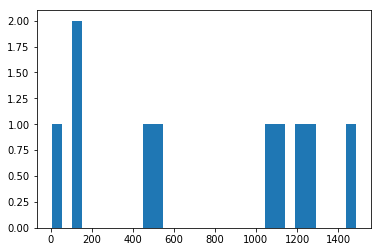

In [119]:
plt.hist(male_bogo.groupby('income_bin').count().iloc[:,0],label=male_bogo.groupby('income_bin').count().index, bins=30)
plt.show()


In [120]:
male_bogo[male_bogo['bogo'] ==1].groupby('income_bin').count()

,id,bogo_completed_fraction,age,became_member_on,gender,income,memb_year,age_bin,bogo
income_bin,,,,,,,,,
3.0,294,294,294,294,294,294,294,294,294
4.0,315,315,315,315,315,315,315,315,315
5.0,592,592,592,592,592,592,592,592,592
6.0,545,545,545,545,545,545,545,545,545
7.0,580,580,580,580,580,580,580,580,580
8.0,350,350,350,350,350,350,350,350,350
9.0,331,331,331,331,331,331,331,331,331
10.0,111,111,111,111,111,111,111,111,111
11.0,113,113,113,113,113,113,113,113,113


In [123]:
bogo_alone.columns

Index(['id', 'bogo_completed_fraction', 'age', 'became_member_on', 'gender',
       'income', 'memb_year', 'age_bin', 'income_bin', 'bogo'],
      dtype='object')

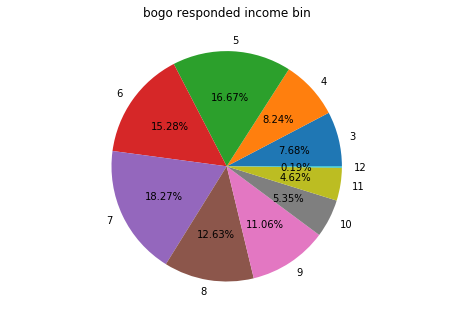

In [124]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(bogo_alone[bogo_alone['bogo']==1].groupby('income_bin').count().iloc[:,0], labels =[3,4,5,6,7,8,9,10,11,12],autopct='%1.2f%%')
plt.title('bogo responded income bin')
plt.show()

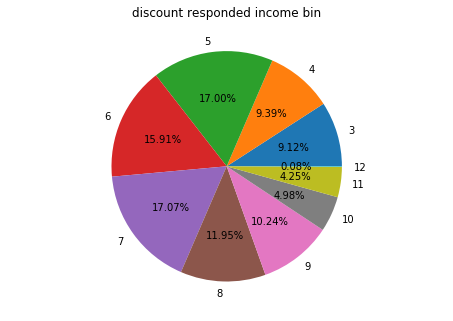

In [125]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(discount_alone[discount_alone['discount']==1].groupby('income_bin').count().iloc[:,0], labels =[3,4,5,6,7,8,9,10,11,12],autopct='%1.2f%%')
plt.title('discount responded income bin')
plt.show()

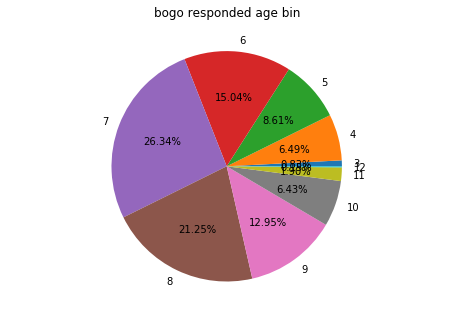

In [194]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(bogo_alone[bogo_alone['bogo']==1].groupby('age_bin').count().iloc[:,0], labels =[3,4,5,6,7,8,9,10,11,12],autopct='%1.2f%%')
plt.title('bogo responded age bin')
plt.show()


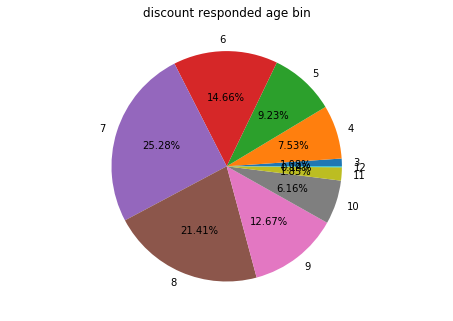

In [195]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(discount_alone[discount_alone['discount']==1].groupby('age_bin').count().iloc[:,0], labels =[3,4,5,6,7,8,9,10,11,12],autopct='%1.2f%%')
plt.title('discount responded age bin')
plt.show()

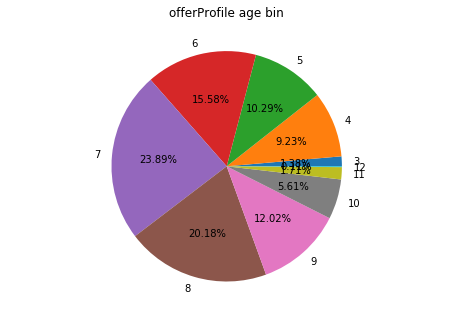

In [197]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(profile.groupby('age_bin').count().iloc[:,0], labels =[3,4,5,6,7,8,9,10,11,12],autopct='%1.2f%%')
plt.title('Profile age bin')
plt.show()